<a href="https://colab.research.google.com/github/Alejandro0699/Estadistica-Machine-Learning/blob/main/optimizacion_aeropotuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

datos= pd.read_csv('https://iaaumentada.s3.us-east-2.amazonaws.com/base-dados/flights.csv')
datos.shape

(71175, 11)

In [31]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [32]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [33]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [34]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


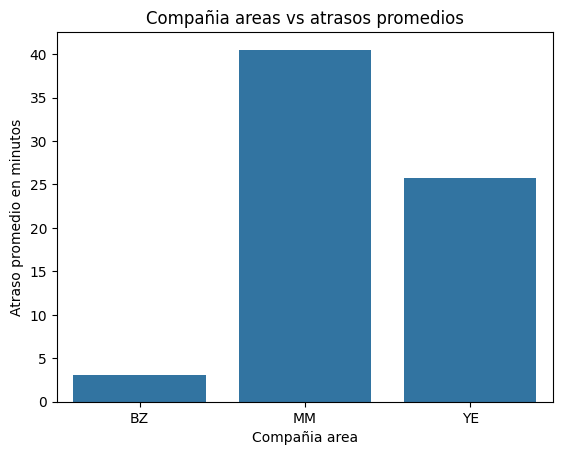

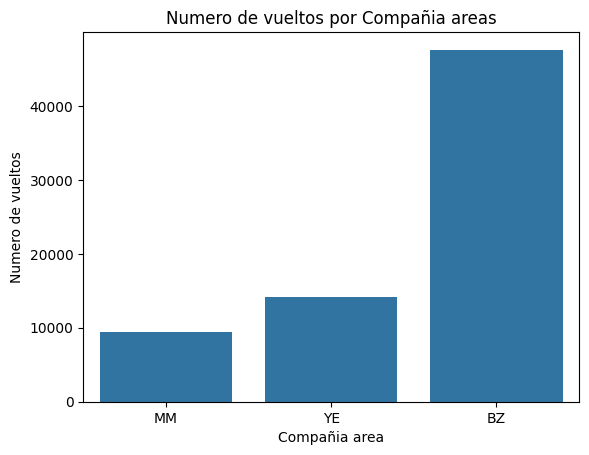

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay= datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañia areas vs atrasos promedios')
plt.xlabel('Compañia area')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Numero de vueltos por Compañia areas')
plt.xlabel('Compañia area')
plt.ylabel('Numero de vueltos')
plt.show()

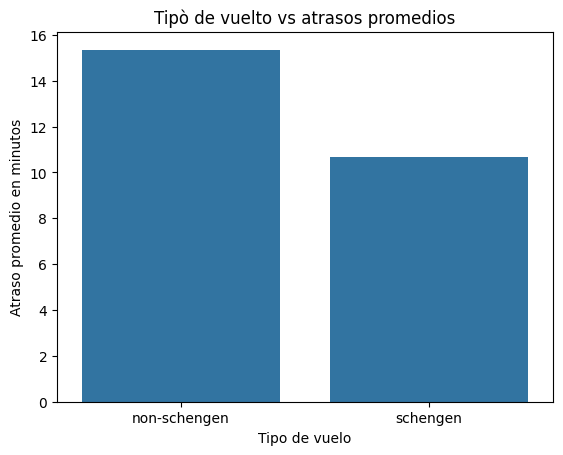

Text(0, 0.5, 'Numero de vueltos')

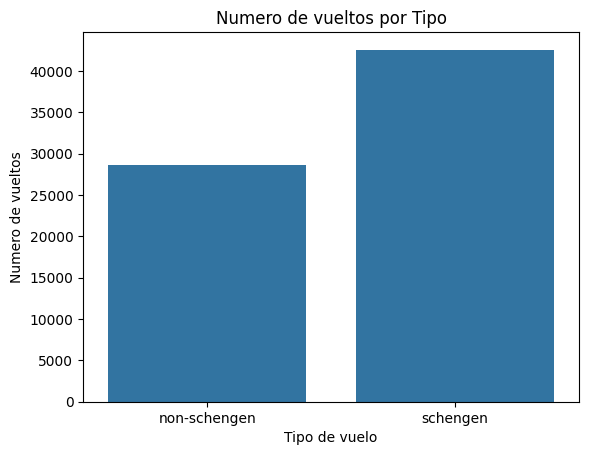

In [36]:
avg_delay= datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipò de vuelto vs atrasos promedios')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Numero de vueltos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Numero de vueltos')

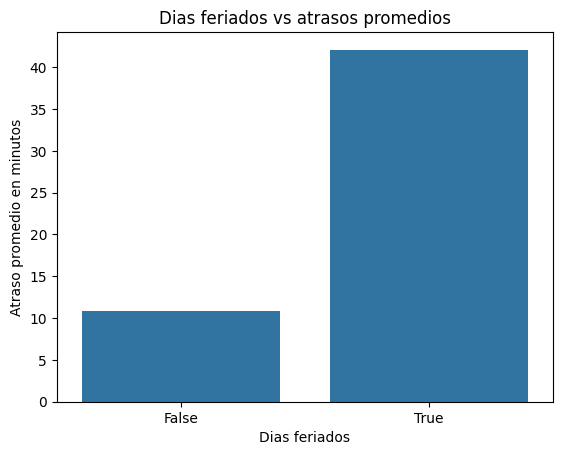

In [37]:
avg_delay= datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs atrasos promedios')
plt.xlabel('Dias feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [38]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

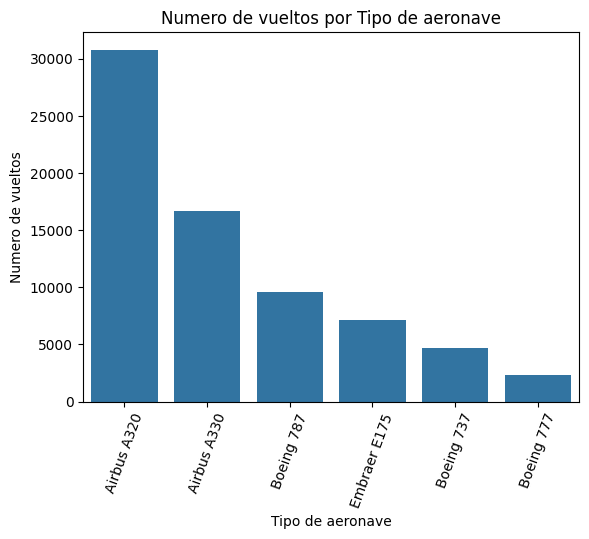

In [39]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Numero de vueltos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Numero de vueltos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

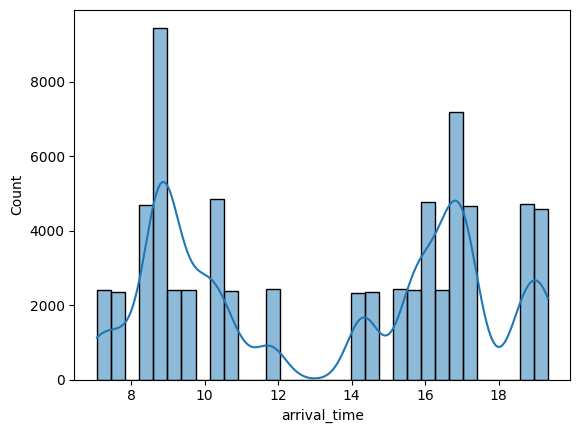

In [40]:
sns.histplot(data=datos, x='arrival_time',kde=True)

In [41]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25= np.percentile(df[columna],[75,25])
  iqr= q75-q25
  ancho= 2* iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

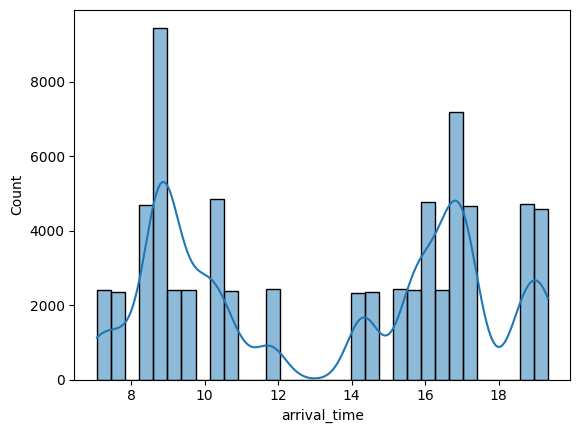

In [42]:
binwidth= ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time',kde=True,binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

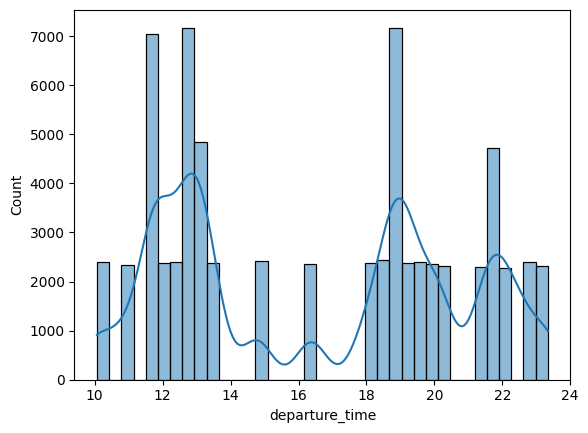

In [43]:
binwidth= ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time',kde=True,binwidth=binwidth)

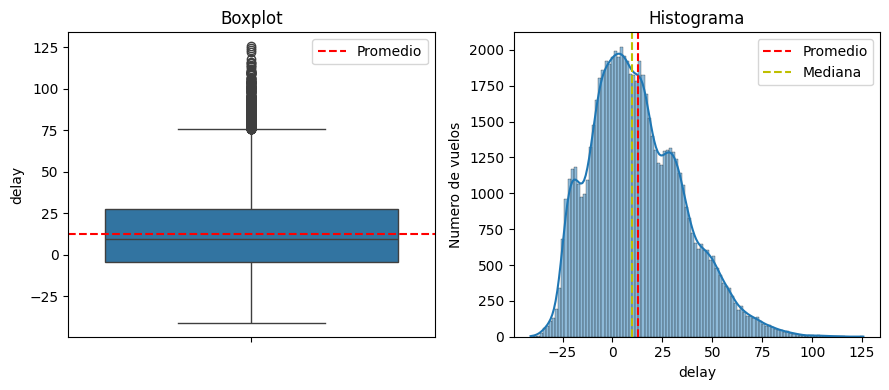

In [44]:
atraso_promedio= datos['delay'].mean()
atraso_mediana= datos['delay'].median()

fig, ax= plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio,color='r',linestyle='--', label='Promedio')
ax[0].legend()

binwidth= ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio,color='r',linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana,color='y',linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

In [45]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [46]:
datos['date']= datos['year'].astype(str)+'-'+(datos['day']+ 1).astype(str)
datos['date']= pd.to_datetime(datos['date'],format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [47]:
datos['is_weekend']= datos['date'].dt.weekday.isin([5,6])
datos['day_name']= datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
33564,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,47,2016,False,33.370865,2016-02-17,False,Wednesday
26405,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,300,2014,True,50.652819,2014-10-28,False,Tuesday
36800,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,263,2016,False,34.800140,2016-09-20,False,Tuesday
49284,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,0,2019,False,10.171406,2019-01-01,False,Tuesday
23155,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,83,2014,False,19.598214,2014-03-25,False,Tuesday


In [48]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
datos['schengen'] =datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] =datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] =datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
43822,11,BZ,Airbus A320,0,EMM,10.177197,13.177197,1,2018,0,7.288802,2018-01-02,0,Tuesday
50943,22,YE,Airbus A320,0,MWL,8.794147,11.794147,111,2019,1,76.037787,2019-04-22,0,Monday
58040,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,219,2020,0,2.313592,2020-08-07,0,Friday


In [51]:
categoricas= ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
datos_codificados= pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
50028,22,0,8.794147,11.794147,50,2019,0,36.895970,2019-02-20,0,...,0,0,0,0,0,0,0,0,0,1
21645,26,0,8.885071,10.885071,348,2013,0,33.698241,2013-12-15,1,...,1,0,0,0,0,0,1,0,0,0
8048,28,0,15.967963,17.967963,171,2011,0,-19.313914,2011-06-21,0,...,0,0,0,0,0,0,0,0,1,0
32,17,0,16.718722,21.718722,2,2010,0,-8.104122,2010-01-03,1,...,0,0,0,0,0,0,1,0,0,0
44752,2,1,19.196804,22.196804,63,2018,0,5.910738,2018-03-05,0,...,0,0,1,0,1,0,0,0,0,0


In [53]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [54]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [55]:
df= datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
50008,1,15.729617,0,18.749401,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
17595,1,8.564949,0,10.977072,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
41943,0,19.341235,0,12.435271,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11440,0,10.733469,0,-21.980511,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
29493,1,16.909690,0,-10.276022,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2479,0,16.571894,0,-10.039782,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
19779,1,7.065594,0,35.123593,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
34707,0,10.172731,0,-15.589877,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
61206,0,15.496519,0,4.599480,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
31933,0,8.794147,0,30.960945,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X= df.drop(['delay'],axis=1)
y= df['delay']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

baseline= DummyRegressor()
baseline.fit(X_train,y_train)


DummyRegressor()

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

y_pred_dummy= baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse= mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test,y_pred)
  metricas= {
      'RMSE':round(rmse**(1/2),4),
      'MAE':round(mae,4),
      'R2':round(r2,4)
  }
  return metricas

In [62]:
resultados_baseline= calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [64]:
from sklearn.ensemble import RandomForestRegressor

modelo= RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred= modelo.predict(X_test)
resultados_rf=calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

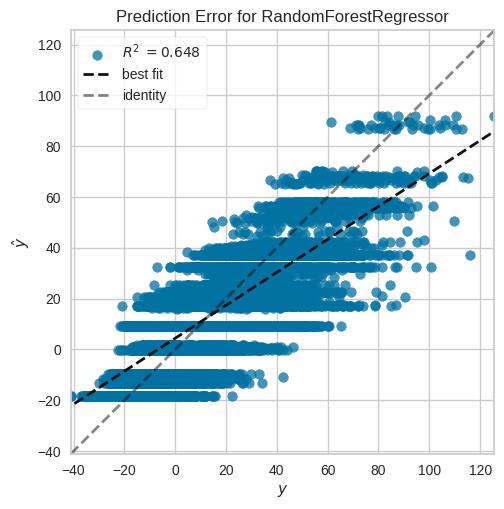

In [65]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

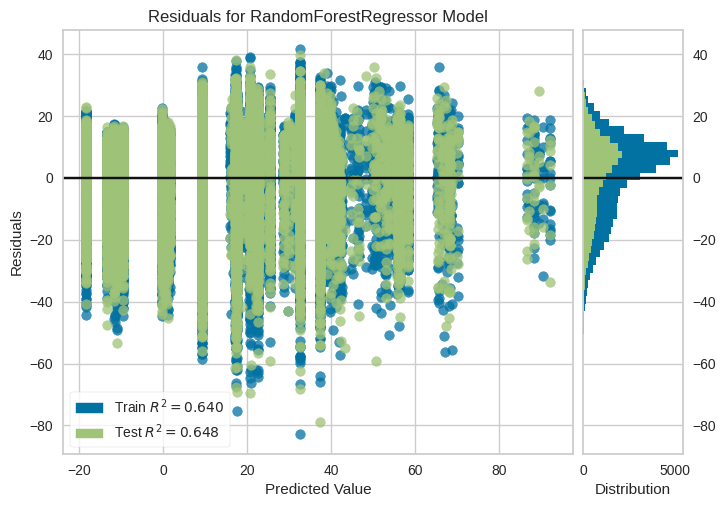

In [66]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [69]:
from sklearn.model_selection import KFold, cross_validate
scoring= {
    'RMSE':'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2':'r2'
}
cv= KFold(n_splits=5, shuffle=True, random_state=42)
cv_results= cross_validate(modelo, X_train, y_train, scoring=scoring,cv=cv)
cv_results

{'fit_time': array([3.33516717, 2.80959749, 2.84409046, 3.30078244, 3.27576876]),
 'score_time': array([0.0615325 , 0.05789876, 0.05730295, 0.06963229, 0.05149317]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

In [71]:
len(df.columns)

31

In [73]:
importances= modelo.feature_importances_

In [77]:
feature_importances= pd.DataFrame({'Feature':X.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Feature,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [78]:
[i if i != 0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

In [79]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature= RandomForestRegressor(max_depth=5,random_state=42)
ct_features= [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features= feature_importances['Feature'].values[:i]
  X_train_sel= X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_feature.fit(X_train_sel,y_train)
  y_pred= model_feature.predict(X_test_sel)
  metricas= calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [80]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature= RandomForestRegressor(max_depth=5,random_state=42)
ct_features= range(10,16)
for i in ct_features:
  selected_features= feature_importances['Feature'].values[:i]
  X_train_sel= X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_feature.fit(X_train_sel,y_train)
  y_pred= model_feature.predict(X_test_sel)
  metricas= calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [81]:
selected_features= feature_importances['Feature'].values[:13]
X_selected_features= X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [82]:
X_train,X_test,y_train,y_test= train_test_split(X_selected_features,y,random_state=42)

In [83]:
param_grid= {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

In [85]:
from sklearn.model_selection import GridSearchCV

cv= KFold(n_splits=5, shuffle=True, random_state=42)
model_grid= GridSearchCV(RandomForestRegressor(random_state=42),
             param_grid=param_grid, scoring='r2',
            cv=cv)

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [86]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [88]:
y_pred_grid= model_grid.predict(X_test)
metricas_model_grid= calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [89]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


In [90]:
import pickle
try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo serializado con exito')
except Exception as e:
  print('Se presento un error al amacenar el modelo', str(e))

Modelo serializado con exito


Para realizar la carga y poder predecir una nueva muestra, vamos a adoptar los pasos a continuación:


1 - Asegúrate de tener el archivo del modelo guardado en un lugar accesible. Por ejemplo, la ruta del archivo puede ser ./modelo_produccion.pkl.


2 - Importa la biblioteca pickle en tu código:


import pickle
Copia el código


3 - Carga el modelo guardado utilizando la función pickle.load():


file_path = './modelos/modelo_produccion.pkl'


try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")

except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

Copia el código
El parámetro 'rb' en el método open() de Python significa "read binary" (leer binario). Después de esto, el modelo está cargado y guardado en la variable model.

4 - Ahora puedes usar el modelo cargado para hacer predicciones con los nuevos datos. Asegúrate de que los datos de entrada estén en el formato esperado por el modelo.

 Ejemplo de predicción con datos de entrada 'X'

model.predict([nueva_muestra])[0]
Copia el código
De esta manera, podemos utilizar el modelo guardado previamente para hacer predicciones en nuevos datos.